# 시각화 / EDA

## Seaborn&EDA
* 탐색적 데이터 분석(Exploratory Data Analysis): 모델링이나 데이터를 분석하는 과정을 위해서 그래프, 시각화 등의 툴을 사용하는 것
* 데이터
    * 정형 데이터: 표 형태로 나타낼 수 있는 데이터
    * 비정형 데이터: 형태로 나타날 수가 X(언어, 소리, 사진,...)
        * 의미값 -> 언어, 노래 등을 코드화-> 이해
        * 좌표값, 색상값 -> 변환
    * 정형 데이터 - 판다스를 통해서 분석할 수 있는 데이터
        * 수치형 데이터: 사칙 연산이 가능함 -> 통계치를 낼 수 있음 -> 분포
            * <mark>연속형 데이터<mark>: 값이 연속되어 있음 -> 무한히 연결되어 있음
                * 실수형(float)/수치형 = 연속형(거의 같은 개념)
            * 이산형 데이터(??)
        * 범주형 데이터: 사칙 연산이 불가능함 -> 더하거나 뺄 수 없음
            * 순서형 데이터: 비교 연산
            * 명목형 데이터: 비교x, 소속, 그룹
        * 숫자로 되어 있다고 해서 수치형 데이터는 아님 (ex. 일련번호) 

## 수치형 데이터 시각화   
* 일정한 범위 내에서 어떻게 분포 되어있는지에 따라 달라짐(데이터가 한쪽으로 쏠리거나, 전체적으로 퍼지거나 등 )
    * 통계기법, 공식을 적용할 수 있는 여부 => 데이터의 모양
* 분포를 알아야 데이터를 변환

In [1]:
import seaborn as sns # matplotlib의 강화버진

In [2]:
titanic = sns.load_dataset('titanic')

### 히스토그램
* 수치형 데이터의 구간별 빈도수를 나타내는 그래프
* 구간 x축: 특정한 데이터들
* 빈도: 특정구간에 데이터가 몇 개나 존재하는지(count)
* 수치형 - 구간을 설정할 수 있음.

<AxesSubplot:xlabel='age', ylabel='Count'>

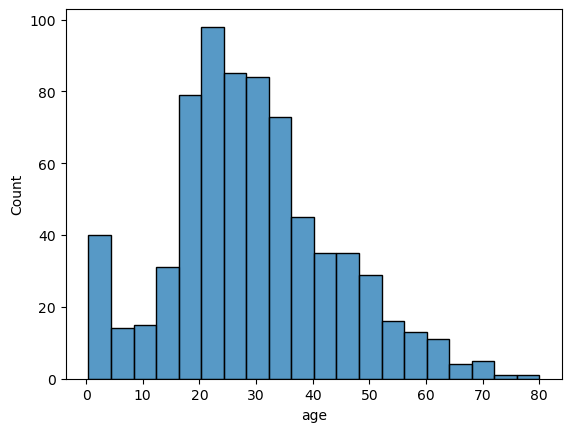

In [3]:
# data = 분석하려는 데이터셋(df), x = 분포를 파악하려는 변수명!
sns.histplot(data=titanic, x='age') # 구간별로 몇 건이 있는지 확인가능

### 커널밀도추정 함수
* 데이터의 구간별 밀도를 곡선 형태로 나타낸 그래프
* 히스토그램의 곡선 버전

<AxesSubplot:xlabel='age', ylabel='Density'>

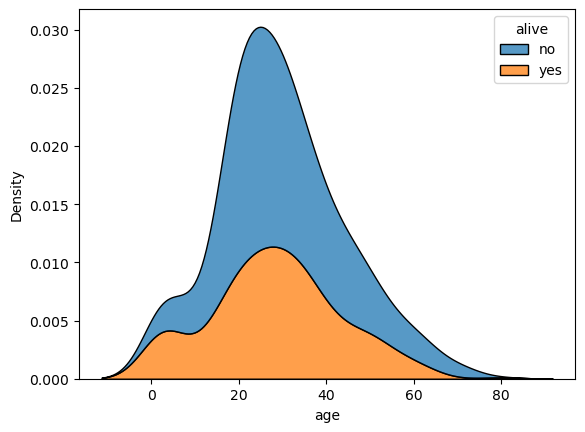

In [4]:
sns.kdeplot(data=titanic, x='age', hue="alive", multiple='stack') 

### 분포도(displot)
* 커널밀도 추정함수, 히스토그램 -> 옵션으로 한번에 표시

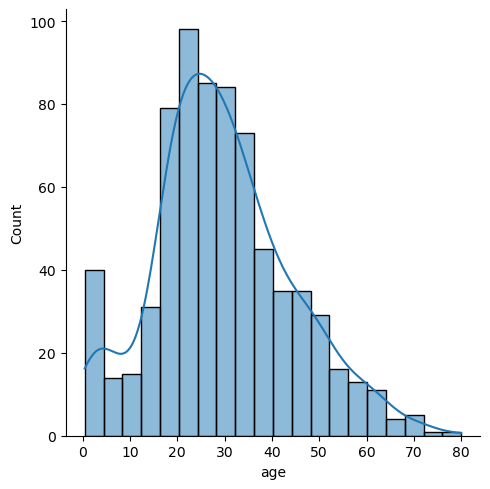

In [5]:
#히스토그램 + 커널밀도 추정함수
sns.displot(data=titanic, x='age',kde=True)

### 러그플롯(rugplot)
* 주변 분포를 나타내는 그래프 - 밀도가 얼마나 밀집되어 있는지 나타내는 선(rug)


<AxesSubplot:xlabel='age', ylabel='Density'>

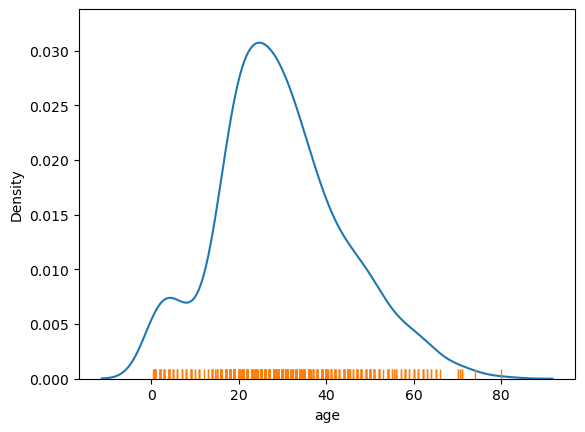

In [6]:
# rugplot이 아래에 있어야 보기 편함 
sns.kdeplot(data=titanic, x = 'age')
sns.rugplot(data=titanic, x = 'age')

### 범주형 데이터 시각화
* 소속, 그룹, 특성 -> 범주형 데이터 값에 따라서 수치형 데이터들이 어떻게 달라지는지 파악 -> 그룹함수, 집계합수를 통해서 갯수, 평균, 표준편차 등을 알 수 있다.
* 인포그래픽, 통계자료

### 막대 그래프(barplot)
* x축: 범주형 변수
* y축: 범주별 평균치 -> 통계적 계산 (복원 추출) → 오차 범위

<AxesSubplot:xlabel='class', ylabel='fare'>

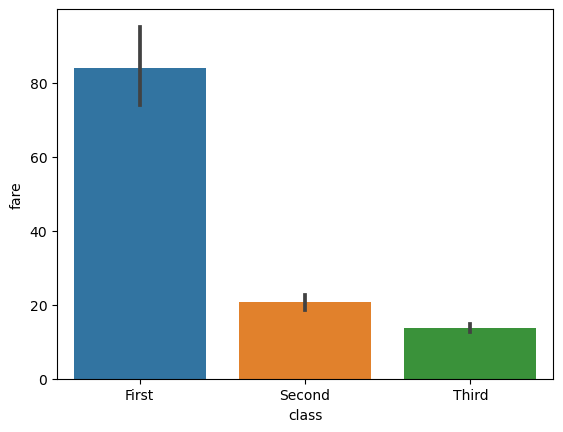

In [7]:
# x: 범주형 데이터 - 등급
# y: 수치형 데이터 - 운임
# barplot -> 원본 평균이 X (원본의 데이터를 사용하는 것이 아니라 통계적인 과정을 거친 평균)
# x로 분류기준을 준 범주형 데이터로 그룹을 나눈다음에, 복원샘플링
sns.barplot(x='class', y = 'fare', data=titanic) # 데이터가 겹치면 알아보기 어려움

### 포인트플롯(pointplot)
* 막대 플롯과 유사하지만 여러개 그래프를 사용할 때 시각적으로 좋음

<AxesSubplot:xlabel='class', ylabel='fare'>

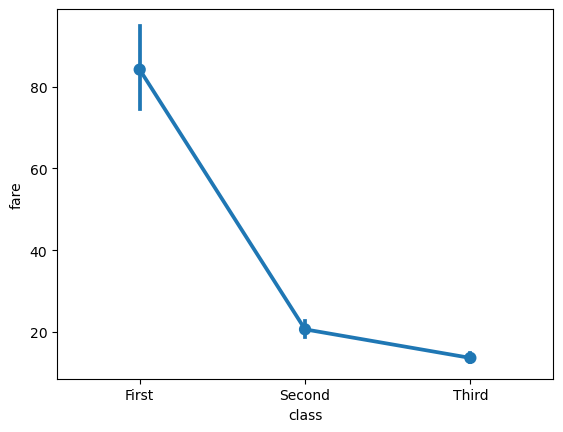

In [8]:
sns.pointplot(x='class', y = 'fare', data=titanic)

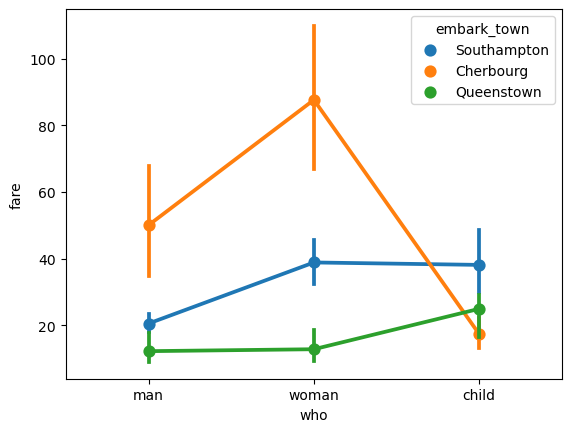

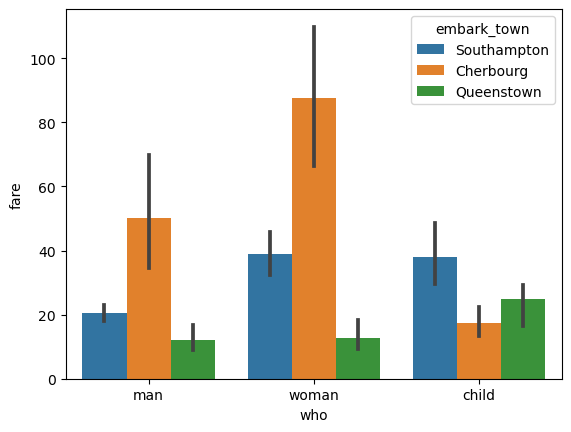

In [9]:
import matplotlib.pyplot as plt
# 포인트 플롯은 여러 그래프를 동시에 그릴 때 시각적으로 유리함
sns.pointplot(x='who', y='fare', data=titanic, hue='embark_town') # 연결성이나 여러개를 곁쳐서 사용시 유리
plt.show()
sns.barplot(x='who', y='fare', data=titanic, hue='embark_town')
plt.show()

### 박스플롯
* 5대 요약 수치 → 최대값, Q1, Q2, Q3, 최소값
* Q1, Q3을 통해서 유추해낸 (예상) 최대,최소값
* 이 범위 안에 있는게 통계적으로 일반적이다. (이 범위를 

<AxesSubplot:xlabel='class', ylabel='age'>

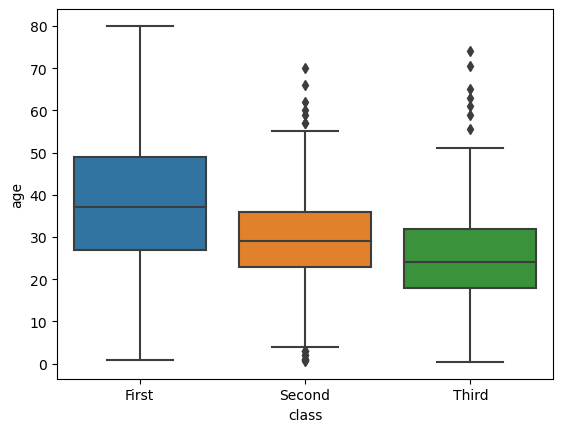

In [10]:
sns.boxplot(x='class', y='age', data=titanic)

### 바이올린 플롯
* 박스 플롯 + 겉 모양을 kde
* 5대 요약수치 + 데이터 분포 정도(밀도) 를 한 번에 시각화

<AxesSubplot:xlabel='class', ylabel='age'>

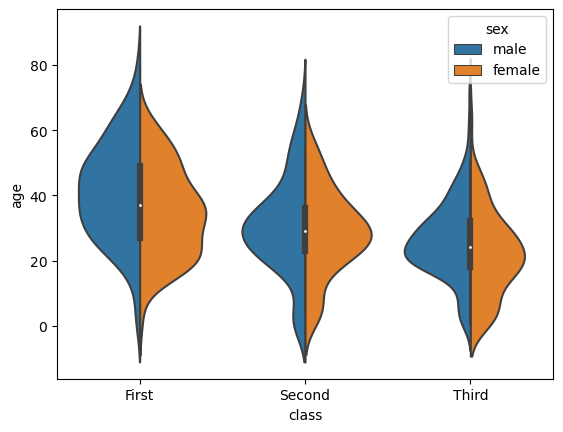

In [11]:
# 왼족 오른쪽 나눠서 한번에 표시
sns.violinplot(x='class', y='age',hue='sex',data=titanic, split=True)

### 카운트플롯
* value_counts, 범주형 데이터의 갯수 (고유한 범주형 데이터 값들의 빈도)

<AxesSubplot:xlabel='count', ylabel='class'>

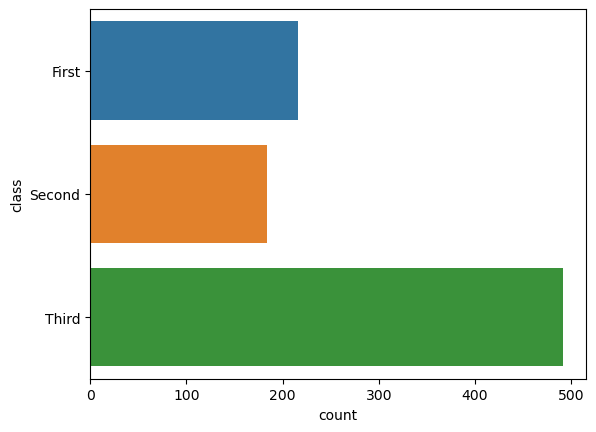

In [12]:
sns.countplot(y='class', data=titanic)

### 파이 그래프(pie)
* seaborn이 지원 하지 않음

In [ ]:
import matplotlib.pyplot as plt

x = [10, 60, 30] # 범주형 데이터별 파이 그래프의 비율
labels = ['A', 'B', 'C']

plt.pie(x=x, labels=labels, autopct='%.1f%%')
plt.show()